## Phase 1 : Exploration des données

### Configuration

In [1]:
import os, yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

config_path = os.path.join("..", "configs", "config.yaml")

# Charger les configurations
with open(config_path, "r") as file:
    config = yaml.safe_load(file)

FILE_DATA = os.path.join("..", config["paths"]["raw_data"], config["files"]["data_raw"])

### Chargement les données et afficher un échantillon

In [2]:
df = pd.read_excel(FILE_DATA, header=0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Analyse des statistiques descriptives

In [9]:
print("\nAperçu des premières lignes et dimensions du DataFrame:")
print(f"\n{df.head()}")
print(f"\nDimensions: {df.shape}")


Aperçu des premières lignes et dimensions du DataFrame:

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Dimensions: (541909, 8)


In [10]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())


Statistiques descriptives:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [11]:
# Vérifier les valeurs uniques dans les colonnes catégorielles
print("\nNombre de valeurs uniques par colonne:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())



Nombre de valeurs uniques par colonne:

InvoiceNo:
InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: count, dtype: int64

StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: count, dtype: int64

Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

Country:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


In [12]:
# Vérifier la présence de valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Analyse des données initiales

D'après l'analyse des cellules précédentes, nous pouvons observer que :

1. Structure des données :
    - Le dataset contient 541 909 lignes et 8 colonnes
    - Les colonnes incluent : InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

2. Valeurs manquantes :
    - Seule la colonne CustomerID contient des valeurs manquantes
    - Les autres colonnes sont complètes

3. Distribution des variables numériques :
    - Les quantités (Quantity) montrent une distribution asymétrique avec quelques valeurs extrêmes
    - Les prix unitaires (UnitPrice) sont également asymétriques avec une concentration sur les prix bas

4. Analyse géographique :
    - Le Royaume-Uni représente la majorité des transactions
   - Plusieurs autres pays européens sont présents dans le dataset

5. Analyse temporelle :
    - Les données couvrent la période de décembre 2010 à décembre 2011
    - On observe des variations dans le nombre de transactions quotidiennes


### Visualisation des données

#### Histogramme de la distribution

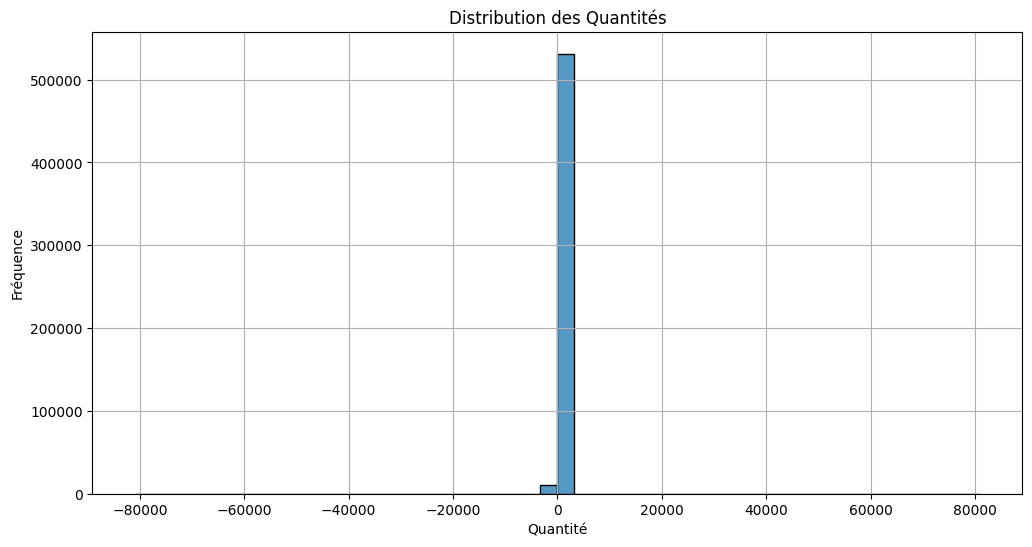

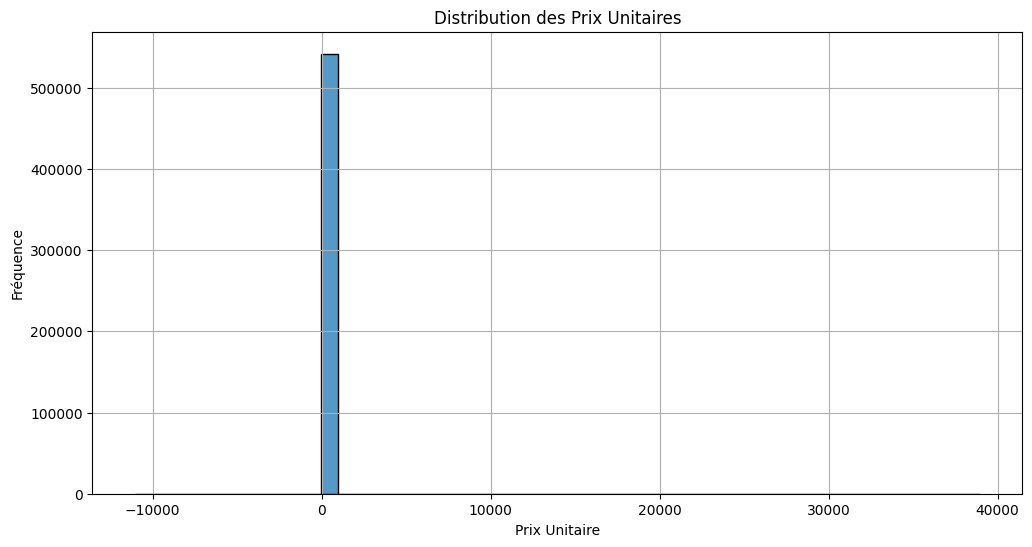

In [14]:
# Configurer la taille des graphiques
plt.figure(figsize=(12, 6))

# Distribution des quantités
sns.histplot(data=df, x='Quantity', bins=50)
plt.title("Distribution des Quantités")
plt.xlabel("Quantité")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Distribution des prix unitaires 
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='UnitPrice', bins=50)
plt.title("Distribution des Prix Unitaires")
plt.xlabel("Prix Unitaire")
plt.ylabel("Fréquence") 
plt.grid(True)
plt.show()

#### Boîtes à moustaches

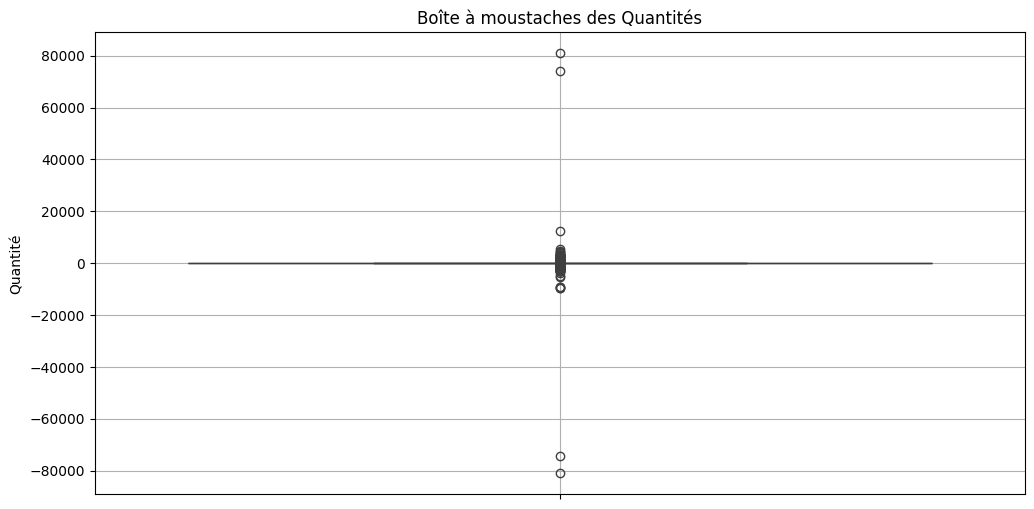

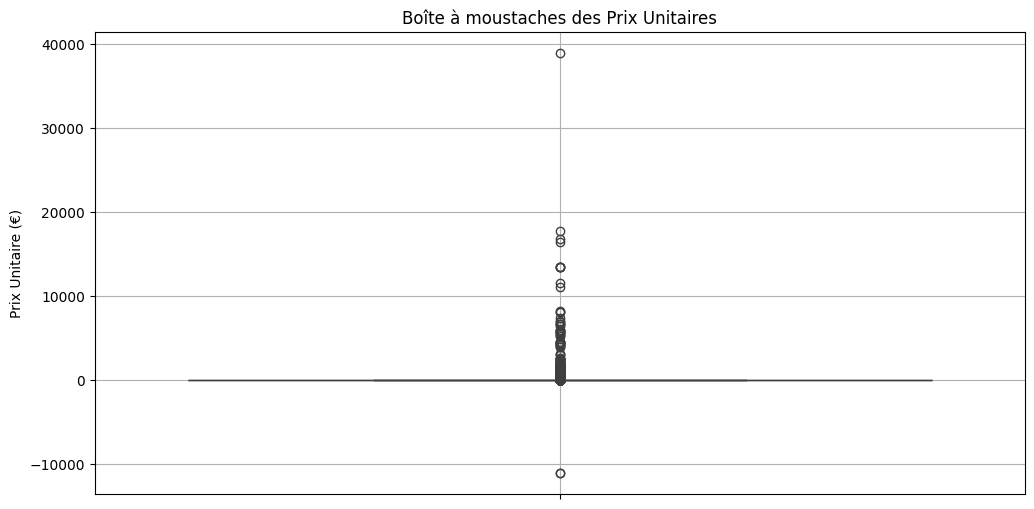

In [8]:
# Boîte à moustaches pour les quantités
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Quantity'])
plt.title("Boîte à moustaches des Quantités")
plt.ylabel("Quantité")
plt.grid(True)
plt.show()

# Boîte à moustaches pour les prix unitaires 
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title("Boîte à moustaches des Prix Unitaires")
plt.ylabel("Prix Unitaire (€)")
plt.grid(True)
plt.show()


#### Analyse des distributions et boîtes à moustaches

Les visualisations ci-dessus nous permettent de faire plusieurs observations importantes :

**Distribution des quantités :**
 - La distribution des quantités est fortement asymétrique (skewed) vers la droite
 - La majorité des commandes concernent des petites quantités (< 50 unités)
 - Il existe des valeurs extrêmes avec des quantités très élevées qui pourraient être des commandes en gros ou des erreurs

**Distribution des prix unitaires :**
 - La distribution des prix est également asymétrique vers la droite
 - La plupart des produits ont un prix unitaire inférieur à 10€
 - On observe quelques produits avec des prix unitaires très élevés qui méritent une investigation

**Boîtes à moustaches :**
 - Les boîtes à moustaches confirment la présence de nombreuses valeurs aberrantes (outliers) tant pour les quantités que pour les prix
 - Ces outliers pourraient avoir un impact significatif sur nos analyses futures et devraient être examinés en détail
 - Il faudra potentiellement traiter ces valeurs extrêmes selon le contexte business (les conserver si ce sont des commandes légitimes en gros, les filtrer si ce sont des erreurs)


#### Diagramme de dispersion

### Identification des valeurs manquantes

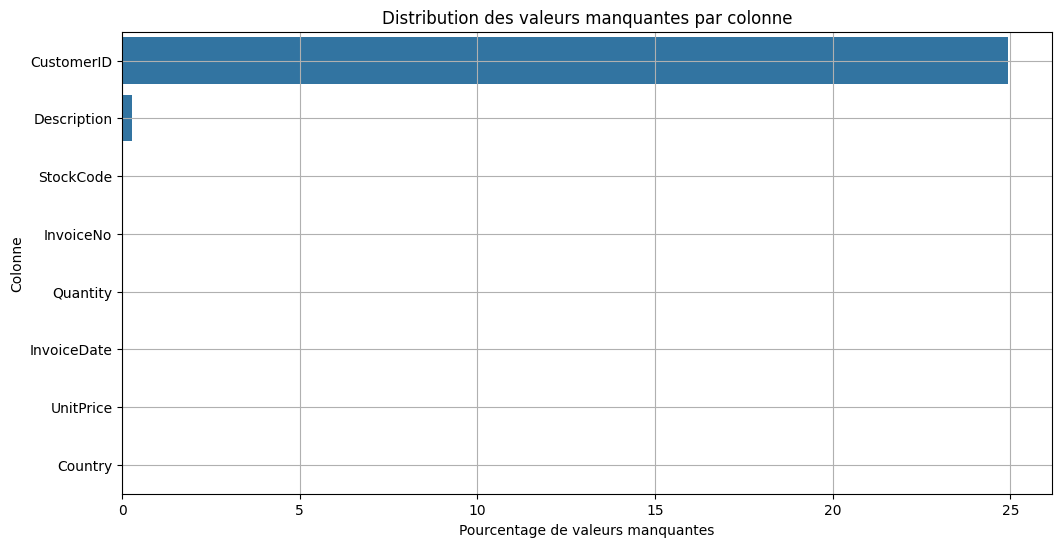


Détail des valeurs manquantes par colonne:
    Colonne  Valeurs manquantes  Pourcentage
 CustomerID              135080        24.93
Description                1454         0.27
  StockCode                   0         0.00
  InvoiceNo                   0         0.00
   Quantity                   0         0.00
InvoiceDate                   0         0.00
  UnitPrice                   0         0.00
    Country                   0         0.00


In [15]:
# Calcul du nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Création d'un DataFrame pour la visualisation
missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage': (missing_values / len(df) * 100).round(2)
})

# Tri par nombre de valeurs manquantes décroissant
missing_df = missing_df.sort_values('Valeurs manquantes', ascending=False)

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x='Pourcentage', y='Colonne', data=missing_df)
plt.title('Distribution des valeurs manquantes par colonne')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.grid(True)
plt.show()

# Affichage du tableau détaillé
print("\nDétail des valeurs manquantes par colonne:")
print(missing_df.to_string(index=False))


### Identification des anomalies potentielles

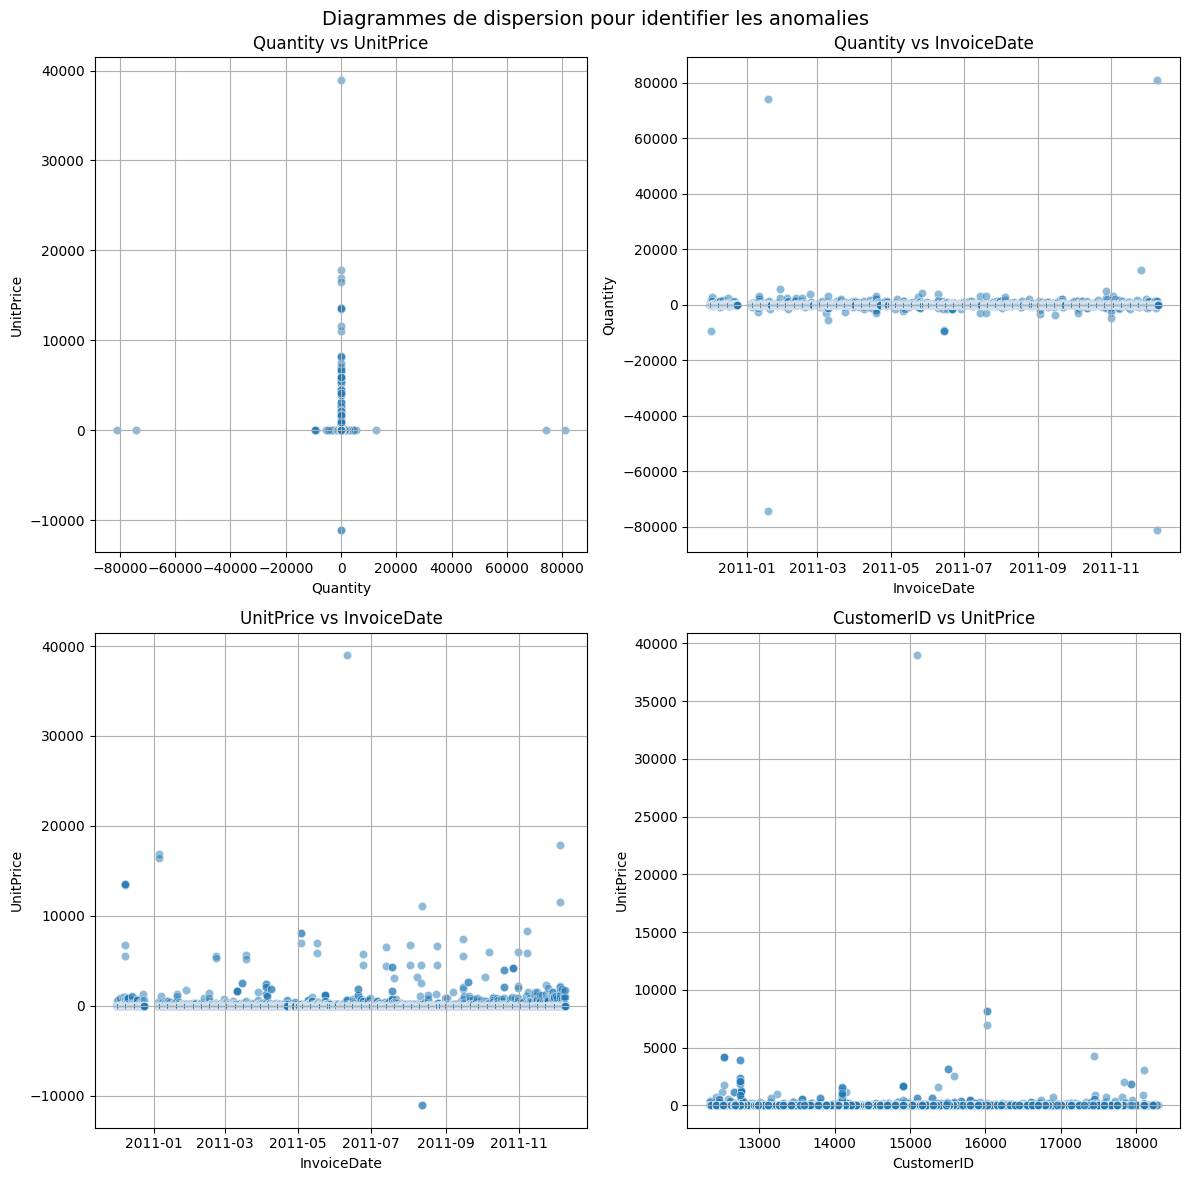


Statistiques descriptives des variables numériques:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

Valeurs extrêmes potentielles:

Quantités extrêmes (> 99e percentile):
    InvoiceNo                      Description  Quantity  UnitPrice
96     536378  PACK OF 72 RETROSPOT CAKE CASES       120       0.42
178    536387                    CHILLI LIGHTS       192       3.82
179    536387   LIGHT GARLAND BUTTERFILES PINK       192       3.37
180    536387       WOODEN OWLS LIGHT GARLAND        192       3.37
181    536387    FAIRY TALE COTTAGE NIGHTLIGHT       432       1.45

Prix unitaires extrêmes (> 99e percentile):
    InvoiceNo                         Description  Quantity  UnitPrice
141   C536379              

In [16]:
# Création d'un subplot pour visualiser les diagrammes de dispersion
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Diagrammes de dispersion pour identifier les anomalies', fontsize=14)

# Quantity vs UnitPrice
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', ax=axes[0,0], alpha=0.5)
axes[0,0].set_title('Quantity vs UnitPrice')
axes[0,0].grid(True)

# Quantity vs InvoiceDate 
sns.scatterplot(data=df, x='InvoiceDate', y='Quantity', ax=axes[0,1], alpha=0.5)
axes[0,1].set_title('Quantity vs InvoiceDate')
axes[0,1].grid(True)

# UnitPrice vs InvoiceDate
sns.scatterplot(data=df, x='InvoiceDate', y='UnitPrice', ax=axes[1,0], alpha=0.5)
axes[1,0].set_title('UnitPrice vs InvoiceDate')
axes[1,0].grid(True)

# CustomerID vs UnitPrice
sns.scatterplot(data=df, x='CustomerID', y='UnitPrice', ax=axes[1,1], alpha=0.5)
axes[1,1].set_title('CustomerID vs UnitPrice')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# Affichage des statistiques descriptives pour identifier les anomalies numériques
print("\nStatistiques descriptives des variables numériques:")
print(df[['Quantity', 'UnitPrice']].describe())

# Identification des valeurs extrêmes potentielles
print("\nValeurs extrêmes potentielles:")
print("\nQuantités extrêmes (> 99e percentile):")
quantity_threshold = df['Quantity'].quantile(0.99)
print(df[df['Quantity'] > quantity_threshold][['InvoiceNo', 'Description', 'Quantity', 'UnitPrice']].head())

print("\nPrix unitaires extrêmes (> 99e percentile):")
price_threshold = df['UnitPrice'].quantile(0.99)
print(df[df['UnitPrice'] > price_threshold][['InvoiceNo', 'Description', 'Quantity', 'UnitPrice']].head())


# Analyse des diagrammes de dispersion

D'après les diagrammes de dispersion, nous pouvons observer plusieurs points intéressants :

1. Quantity vs UnitPrice :
- La majorité des transactions se concentrent sur des quantités et prix unitaires faibles
- On observe quelques valeurs extrêmes, notamment des quantités très élevées et des prix unitaires élevés
- Il semble y avoir une légère corrélation négative : plus la quantité est élevée, plus le prix unitaire tend à être bas

2. Quantity vs InvoiceDate :
- La distribution des quantités reste relativement stable dans le temps
- On observe des pics ponctuels de grandes quantités qui pourraient correspondre à des commandes exceptionnelles
- Pas de tendance temporelle claire dans l'évolution des quantités

3. UnitPrice vs InvoiceDate :
- Les prix unitaires restent globalement stables sur la période
- Quelques valeurs extrêmes sont visibles mais ne suivent pas de pattern temporel particulier
- Pas d'inflation ou de déflation notable sur la période

4. CustomerID vs UnitPrice :
- La distribution des prix est similaire pour la plupart des clients
- Certains clients semblent avoir accès à des produits plus chers ou bénéficient de tarifs particuliers
- Pas de segmentation claire de la clientèle basée sur les prix
